### <U>SAFETY PREDICTION IN VARIOUS DISTRICTS OF CHICAGO IN DIFFERENT TIME OF THE YEAR</U>

#### GROUP MEMBERS: 
1. Sami Ahmad Khan, A20352677
2. Arshad Shaik
3. Zeeshan Aamir Khavas
4. Akshay Gupte


#### PROJECT DESCRIPTION:

In [77]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
%matplotlib inline

In [78]:
#Input File

input_file = "Crimes.csv"

In [79]:
#Reading the input file and saving it as a Dataframe

df = pd.read_csv(input_file, skip_blank_lines=True)
keep_col = ['Date','Primary Type','Arrest','District','Ward']
new_df = df[keep_col]

In [80]:
df.isnull().values.any()

True

In [81]:
new_df.head()

,Date,Primary Type,Arrest,District,Ward
0,5/3/16 21:00,NARCOTICS,True,11,28
1,5/3/16 21:35,THEFT,False,8,13
2,5/3/16 14:45,ASSAULT,False,9,12
3,5/3/16 18:42,BATTERY,False,8,15
4,5/3/16 19:30,CRIMINAL DAMAGE,False,9,14


In [82]:
#fig, ax = plt.subplots()
#df['Block'].value_counts().plot(ax=ax, kind='bar')

In [83]:
new_df.insert(3,'Danger Value','')
new_df.insert(5,'Label','')
#df[~df.Block.str.contains("كونت")]

In [84]:
new_df.head()

,Date,Primary Type,Arrest,Danger Value,District,Label,Ward
0,5/3/16 21:00,NARCOTICS,True,,11,,28
1,5/3/16 21:35,THEFT,False,,8,,13
2,5/3/16 14:45,ASSAULT,False,,9,,12
3,5/3/16 18:42,BATTERY,False,,8,,15
4,5/3/16 19:30,CRIMINAL DAMAGE,False,,9,,14


In [85]:
new_df.insert(3,'Crime Weightage','')
new_df.head()
crime_type = new_df['Primary Type']
crime_weightage = new_df['Crime Weightage']

In [86]:
#crime_weightage[1] = 4
#for i in crime_type:
    #print(i)
    #if(i == 'NARCOTICS' or i == 'ASSAULT' or i == 'SEX OFFENSE' or 'CRIM SEXUAL ASSAULT' or 'HOMICIDE' or 'HUMAN TRAFFICKING'):
        #print(i)
        #crime_weightage[j] = 4
    #j = j+1
#new_df.head()        
#print('hello')   

In [87]:
new_df.head()

,Date,Primary Type,Arrest,Crime Weightage,Danger Value,District,Label,Ward
0,5/3/16 21:00,NARCOTICS,True,,,11,,28
1,5/3/16 21:35,THEFT,False,,,8,,13
2,5/3/16 14:45,ASSAULT,False,,,9,,12
3,5/3/16 18:42,BATTERY,False,,,8,,15
4,5/3/16 19:30,CRIMINAL DAMAGE,False,,,9,,14


In [88]:
new_df.columns

Index(['Date', 'Primary Type', 'Arrest', 'Crime Weightage', 'Danger Value',
       'District', 'Label', 'Ward'],
      dtype='object')

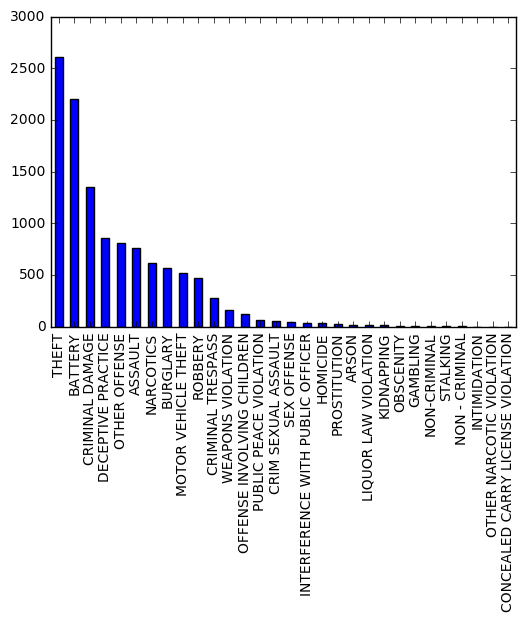

In [89]:
fig, ax = plt.subplots()
df['Primary Type'].value_counts().plot(ax=ax, kind='bar')

In [90]:
print(df.shape)

(11670, 22)


In [91]:
print(crime_type.shape)

(11670,)


In [92]:
new_df.columns

Index(['Date', 'Primary Type', 'Arrest', 'Crime Weightage', 'Danger Value',
       'District', 'Label', 'Ward'],
      dtype='object')

In [93]:
mymap = {'THEFT':1,'BATTERY':2,'CRIMINAL DAMAGE':3,'ASSAULT':4,'OTHER OFFENSE':5,
         'DECEPTIVE PRACTICE':6,'BURGLARY':7,'NARCOTICS':8,'ROBBERY':9,'MOTOR VEHICLE THEFT':10,
         'CRIMINAL TRESPASS':11,'WEAPONS VIOLATION':12,'OFFENSE INVOLVING CHILDREN':13,'PUBLIC PEACE VIOLATION':14,
         'CRIM SEXUAL ASSAULT':15,'SEX OFFENSE':16,'INTERFERENCE WITH PUBLIC OFFICER':17,'PROSTITUTION':18,'HOMICIDE':19,'ARSON':20,'LIQUOR LAW VIOLATION':21,
        'GAMBLING':22,'KIDNAPPING':23,'STALKING':24,'INTIMIDATION':25,'NON-CRIMINAL':26,'OBSCENITY':27,'CONCEALED CARRY LICENSE VIOLATION':28,'PUBLIC INDECENCY':29,
        'HUMAN TRAFFICKING':30,'NON - CRIMINAL':31,'OTHER NARCOTIC VIOLATION':32,'NON-CRIMINAL (SUBJECT SPECIFIED)':33}

In [94]:
#new_df.applymap(lambda s: mymap.get(s) if s in mymap else s)
#new_df.replace({'THEFT': mymap, 'NARCOTICS': mymap})

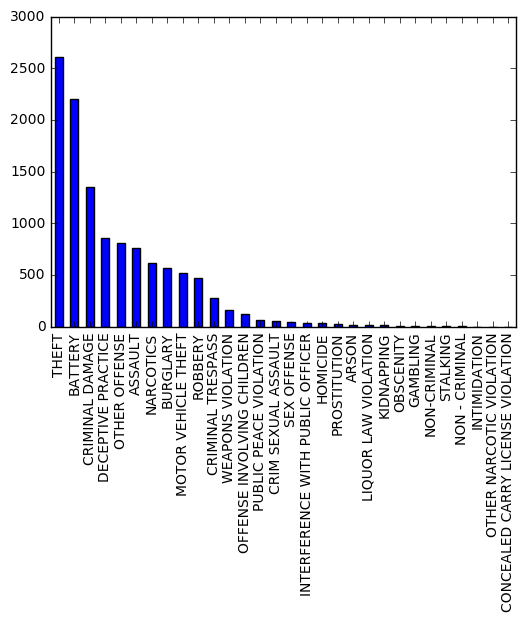

In [95]:
fig, ax = plt.subplots()
new_df['Primary Type'].value_counts().plot(ax=ax, kind='bar')

In [96]:
crime_type = pd.Series(new_df['Primary Type'])

mymap = {'THEFT':1,'BATTERY':2,'CRIMINAL DAMAGE':3,'ASSAULT':4,'OTHER OFFENSE':5,
         'DECEPTIVE PRACTICE':6,'BURGLARY':7,'NARCOTICS':8,'ROBBERY':9,'MOTOR VEHICLE THEFT':10,
         'CRIMINAL TRESPASS':11,'WEAPONS VIOLATION':12,'OFFENSE INVOLVING CHILDREN':13,'PUBLIC PEACE VIOLATION':14,
         'CRIM SEXUAL ASSAULT':15,'SEX OFFENSE':16,'INTERFERENCE WITH PUBLIC OFFICER':17,'PROSTITUTION':18,'HOMICIDE':19,'ARSON':20,'LIQUOR LAW VIOLATION':21,
        'GAMBLING':22,'KIDNAPPING':23,'STALKING':24,'INTIMIDATION':25,'NON-CRIMINAL':26,'OBSCENITY':27,'CONCEALED CARRY LICENSE VIOLATION':28,'PUBLIC INDECENCY':29,
        'HUMAN TRAFFICKING':30,'NON - CRIMINAL':31,'OTHER NARCOTIC VIOLATION':32,'NON-CRIMINAL (SUBJECT SPECIFIED)':33}

In [97]:
def crime_score(x):
    
    if x=='THEFT':
        return 1
    elif x=='BATTERY':
        return 2
    elif x =='CRIMINAL DAMAGE':
        return 3
    elif x == 'ASSAULT':
        return 3
    elif x == 'OTHER OFFENSE': #delete this entry
        return 2
    elif x == 'DECEPTIVE PRACTICE':
        return 1
    elif x == 'BURGLARY':
        return 2
    elif x == 'NARCOTICS':
        return 4
    elif x =='ROBBERY':
        return 1
    elif x == 'MOTOR VEHICLE THEFT':
        return 2
    elif x =='CRIMINAL TRESPASS':
        return 3
    elif x == 'WEAPONS VIOLATION':
        return 2
    elif x == 'OFFENSE INVOLVING CHILDREN':
        return 4
    elif x == 'PUBLIC PEACE VIOLATION':
        return 3
    elif x == 'CRIM SEXUAL ASSAULT':
        return 4
    elif x == 'SEX OFFENSE':
        return 4
    elif x == 'INTERFERENCE WITH PUBLIC OFFICER':
        return 4
    elif x == 'PROSTITUTION':
        return 4
    elif x == 'HOMICIDE':
        return 4
    elif x == 'ARSON': 
        return 3
    elif x == 'LIQUOR LAW VIOLATION':
        return 1
    elif x =='GAMBLING':
        return 1
    elif x =='KIDNAPPING':
        return 3
    elif x =='STALKING':
        return 1
    elif x == 'INTIMIDATION':
        return 1
    elif x == 'NON-CRIMINAL':
        return 0
    elif x =='OBSCENITY':
        return 2
    elif x == 'CONCEALED CARRY LICENSE VIOLATION':
        return 3
    elif x == 'PUBLIC INDECENCY':
        return 2
    elif x == 'HUMAN TRAFFICKING':
        return 4
    elif x == 'NON - CRIMINAL':
        return 0
    elif x == 'OTHER NARCOTIC VIOLATION':
        return 4
    elif x == 'NON-CRIMINAL (SUBJECT SPECIFIED)':
        return 0

def arrest_score(x):
    if x=='TRUE':
        return 1
    elif x=='FALSE':
        return 0
    elif x=='True':
        return 1
    elif x=='False':
        return 0
    
    

In [98]:
#Adding Crime Weightage which is equal to Crime Score of that particualr Crime Type + 1 if there is an Arrest and 0 if no Arrest
new_df['Crime Weightage'] = new_df['Primary Type'].apply(crime_score) + new_df['Arrest'].astype(int)

/Users/samiahmadkhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [99]:
new_df.head()

,Date,Primary Type,Arrest,Crime Weightage,Danger Value,District,Label,Ward
0,5/3/16 21:00,NARCOTICS,True,5,,11,,28
1,5/3/16 21:35,THEFT,False,1,,8,,13
2,5/3/16 14:45,ASSAULT,False,3,,9,,12
3,5/3/16 18:42,BATTERY,False,2,,8,,15
4,5/3/16 19:30,CRIMINAL DAMAGE,False,3,,9,,14


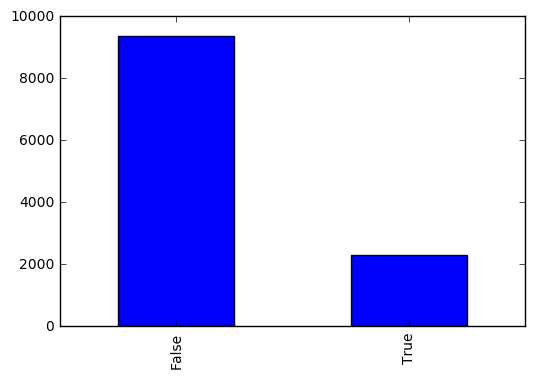

In [100]:
fig, ax = plt.subplots()
new_df['Arrest'].value_counts().plot(ax=ax, kind='bar')

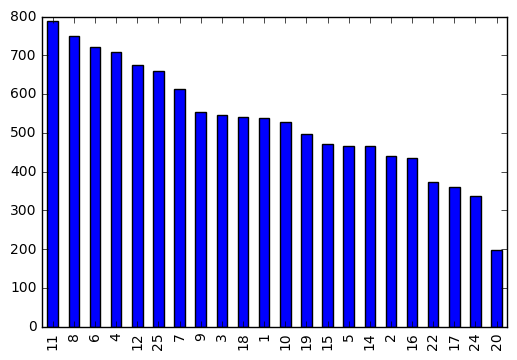

In [101]:
fig, ax = plt.subplots()
new_df['District'].value_counts().plot(ax=ax, kind='bar')

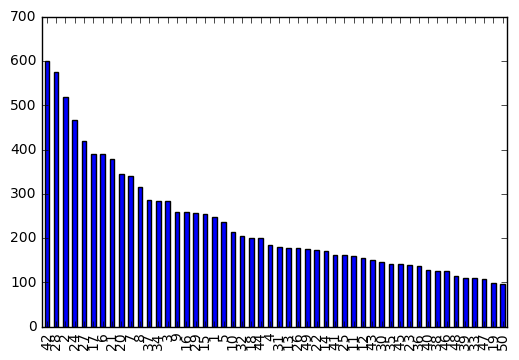

In [102]:
fig, ax = plt.subplots()
new_df['Ward'].value_counts().plot(ax=ax, kind='bar')

In [103]:
new_df.describe()

,Crime Weightage,District,Ward
count,11670.000000,11670.000000,11670.000000
mean,2.233248,11.355013,22.992288
std,1.131022,6.889840,13.952515
min,0.000000,1.000000,1.000000
25%,1.000000,6.000000,10.000000
50%,2.000000,10.000000,23.000000
75%,3.000000,17.000000,34.000000
max,5.000000,25.000000,50.000000


In [104]:
#new_df.groupby(['District','Primary Type'])['Crime Weightage'].count()

In [105]:
cleaned_df = new_df.groupby(['District','Primary Type']).agg({'Crime Weightage':'mean', 'Primary Type':'count'})

In [106]:
cleaned_df.rename(columns={'Primary Type':'Counts'},inplace=True)

In [107]:
print(cleaned_df.shape)

(423, 2)


In [108]:
#values = cleaned_df.Primary * df.Amount
#cleaned_df.dropna()
#cleaned_df.insert(2,'Safety Value','')
cleaned_df.describe()

,Counts,Crime Weightage
count,423.000000,423.000000
mean,27.588652,2.861875
std,38.559378,1.269212
min,1.000000,0.000000
25%,2.500000,2.000000
50%,13.000000,3.000000
75%,37.000000,4.000000
max,269.000000,5.000000


In [109]:
cleaned_df['Danger Value'] = cleaned_df['Crime Weightage']* cleaned_df['Counts']


In [110]:
cleaned_df.head()

Counts  Crime Weightage  Danger Value
District Primary Type                                              
1        ASSAULT                  28         3.250000          91.0
         BATTERY                  52         2.288462         119.0
         BURGLARY                  4         2.000000           8.0
         CRIM SEXUAL ASSAULT       2         4.000000           8.0
         CRIMINAL DAMAGE          25         3.120000          78.0

In [111]:
# custom apply function
#def func(group):
    #return group.reset_index(drop=True).reindex(np.arange(group.District)).fillna(method='ffill')
# groupby apply
#result = cleaned_df.groupby(level=0).apply(func)


In [112]:
i = 0
safe = list();
for index, row in cleaned_df.iterrows():
    safe.append(row['Danger Value'])
    new_df.loc[(new_df['District'] == index[0]) & (new_df['Primary Type'] == index[1]), 'Danger Value'] = safe[i]
    i = i + 1

/Users/samiahmadkhan/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [125]:
new_df['Danger Value'] = new_df['Danger Value'].astype(float)

/Users/samiahmadkhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Here we can see the  various order statistics for Danger Value in Column 2

In [131]:
new_df.describe()

,Crime Weightage,Danger Value,District,Ward
count,11670.000000,11670.000000,11670.000000,11670.000000
mean,2.233248,159.020308,11.355013,22.992288
std,1.131022,139.763861,6.889840,13.952515
min,0.000000,0.000000,1.000000,1.000000
25%,1.000000,67.000000,6.000000,10.000000
50%,2.000000,126.000000,10.000000,23.000000
75%,3.000000,230.000000,17.000000,34.000000
max,5.000000,945.000000,25.000000,50.000000
